# Simple MNIST MLP Classifier with regularization and Hyperparameter search

**Description:** Simple example for Multi Layer Perceptron MNIST Classifier included several regularization 
examples like dropout, learning rate, early stopping<br>
This example has larger layers and more complex training<br>
**Dataset:** Classical MNIST dataset <br>
.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # to avoid warning messages

import tensorflow as tf
import matplotlib.pyplot as plt

import keras_tuner as kt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras.models import Model


def Analyze_training(h):
# summarize history for accuracy
# history.history.keys() -> dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
   plt.plot(h.history['accuracy'])
   plt.plot(h.history['val_accuracy'])
   plt.title('model accuracy')
   plt.ylabel('accuracy')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
# summarize history for loss
   plt.plot(h.history['loss'])
   plt.plot(h.history['val_loss'])
   plt.title('model loss')
   plt.ylabel('loss')
   plt.xlabel('epoch')
   plt.legend(['train', 'test'], loc='upper left')
   plt.show()
   return

In [2]:
# Data definitions
bsize = 256
epochs = 15


### Data Preparation

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train.shape

(60000, 10)

### Hyperparameter Search

In [5]:
# MLP definition & Hyperparameter size

def build_model(hp):
    
   ### Optimization of layer sizes
   hlayer1 = hp.Choice('layer1', [8,16,32,128,256,512]) 
   hlayer2 = hp.Int('layer2', min_value=32, max_value=512, step=32)
   hlayer3 = hp.Choice('layer3', [8,16,32,128,256,512]) 
   bsize = hp.Int('layer2', min_value=32, max_value=512, step=32)
   # iput layer
   inputs = layers.Input(shape=(784,))
   # first hidden layer
   x = layers.Dense(hlayer1, activation='relu')(inputs)
   x = layers.Dropout(0.1)(x)
   # second hidden layer
   x = layers.Dense(hlayer2, activation='relu')(x)
   x = layers.Dropout(0.1)(x)
   # third hidden layer
   x = layers.Dense(hlayer3, activation='relu')(x)
   x = layers.Dropout(0.1)(x)
   #Final Layer (Output)
   output = layers.Dense(10, activation='softmax')(x)
    
   model = Model(inputs=[inputs], outputs=output)
   model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),
              metrics=['accuracy'])   
    
   return model

In [7]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=500,
    overwrite = True)

In [8]:
tuner.search(x_train, y_train, epochs=15, batch_size = bsize, validation_data=(x_test, y_test))
best_model = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 277 Complete [00h 00m 16s]
val_accuracy: 0.9824000000953674

Best val_accuracy So Far: 0.9854000210762024
Total elapsed time: 01h 38m 11s
INFO:tensorflow:Oracle triggered exit


### Test the best result 

In [9]:
print('best model has layer1:', best_model.get('layer1'), 'layer 2:', best_model.get('layer2'), 'layer 3:', 
       best_model.get('layer3'))

best model has layer1: 512 layer 2: 64 layer 3: 128


In [10]:
hlayer1 = best_model.get('layer1')
hlayer2 = best_model.get('layer2')
hlayer3 = best_model.get('layer3')

In [11]:
def get_MLP():
    
    # iput layer
    inputs = layers.Input(shape=(784,))
    # first hidden layer
    x = layers.Dense(hlayer1, activation='relu')(inputs)
    x = layers.Dropout(0.1)(x)
    # second hidden layer
    x = layers.Dense(hlayer2, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    # third hidden layer
    x = layers.Dense(hlayer3, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    #Final Layer (Output)
    output = layers.Dense(10, activation='softmax')(x)
    
    model = Model(inputs=[inputs], outputs=output)
    
    return model

In [12]:
model = get_MLP()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0   

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=bsize,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/15
235/235 [==============================] - 2s 7ms/step - loss: 0.3665 - accuracy: 0.8891 - val_loss: 0.1525 - val_accuracy: 0.9522
Epoch 2/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1332 - accuracy: 0.9601 - val_loss: 0.1292 - val_accuracy: 0.9609
Epoch 3/15
235/235 [==============================] - 2s 7ms/step - loss: 0.0890 - accuracy: 0.9729 - val_loss: 0.0798 - val_accuracy: 0.9753
Epoch 4/15
235/235 [==============================] - 2s 6ms/step - loss: 0.0678 - accuracy: 0.9792 - val_loss: 0.0713 - val_accuracy: 0.9780
Epoch 5/15
235/235 [==============================] - 2s 6ms/step - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0735 - val_accuracy: 0.9791
Epoch 6/15
235/235 [==============================] - 2s 7ms/step - loss: 0.0440 - accuracy: 0.9863 - val_loss: 0.0759 - val_accuracy: 0.9780
Epoch 7/15
235/235 [==============================] - 2s 6ms/step - loss: 0.0373 - accuracy: 0.9880 - val_loss: 0.0866 - val_accuracy: 0.9769
Epoch 

Test loss: 0.09177038818597794
Test accuracy: 0.9815999865531921
Train accuracy: 0.9972166419029236


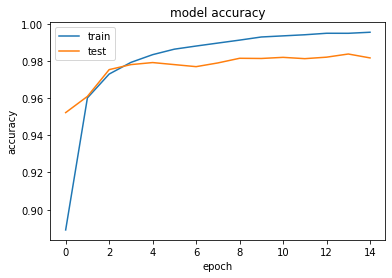

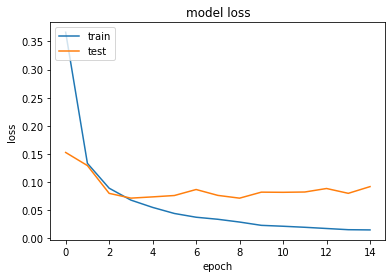

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score = model.evaluate(x_train, y_train, verbose=0)
print('Train accuracy:', score[1])

Analyze_training(history)